# two dimensional problem 

## find local minima of a function of two varables using gradient descent 

we will run two experiments reguarding two different functions:

- $ f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2 $
- $ f(x1, x2) = 10 * (x1 - 1)^2 + (x2 - 2)^2 $

both functions are strictly convex, tharefore the there is nly one local minima that concides with the global minima, but the two functions behave in a sligthly different way. The first one is standard, the second one have a little problem reguarding the steepest direction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

define the function 

In [2]:
def f(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1, x2 = x
    return np.array([2*(x1 - 3), 2*(x2 - 1)])

x_true = np.array([3,1])

plot the function

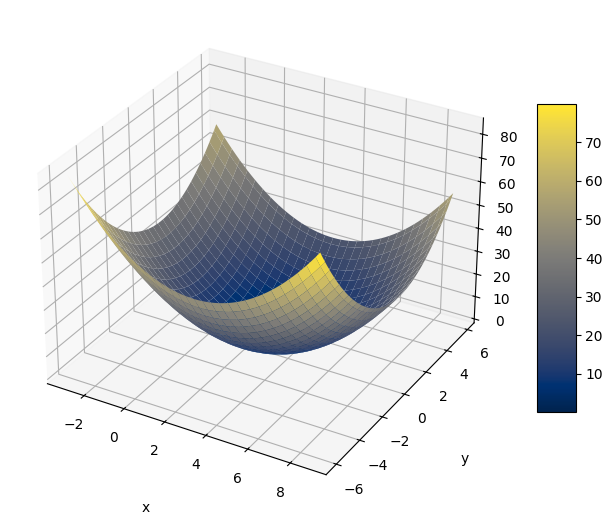

In [3]:
# prepare the mesh
x = np.arange(-3,9,0.2)
y = np.arange(-6,6,0.2)
X, Y = np.meshgrid(x, y)

# compute the value of f on the mesh
Z = np.zeros((60,60))
for i in range(60):
    for j in range(60):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))

# prepare the 3D space 
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

# plot
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

define multidimensional gradient descent method 

In [4]:
def GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-6):
    
    x_val = [x0]
    f_val = [f(x0)]
    grad_x0 = grad_f(x0)
    norm_grad_x0 = np.linalg.norm(grad_x0,2)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the new point  
        x_old = x_val[k]
        x_new = x_old - alpha * grad_f(x_old)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grad_x_new = np.linalg.norm(grad_x_new,2)
        norm_grads.append(norm_grad_x_new)
        
        # first condition 
        if norm_grad_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if np.linalg.norm(x_new - x_old,2) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

perform the experiment 

alplha = 0.1: GD on the function f converges after 61 iterations to the point [2.99999632 0.99999877]
alplha = 0.01: GD on the function f converges after 549 iterations to the point [2.99995427 0.99998476]
alplha = 0.001: GD on the function f converges after 1000 iterations to the point [2.59480643 0.86493548]
alplha = 0.0001: GD on the function f converges after 1000 iterations to the point [0.54385687 0.18128562]


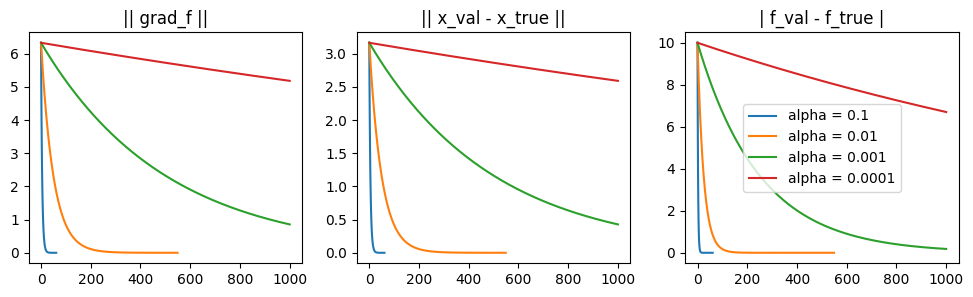

In [5]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# chose the initial iteration 
x0 = np.zeros((2,))

# set step-size range
alphas = (1e-1, 1e-2, 1e-3, 1e-4)
plt.figure(figsize=(12,3))

for alpha in alphas:

    # test the algorithm
    x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

    # plot the results
    print(f"alplha = {alpha}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

    plt.subplot(1, 3, 1)
    plt.plot(norm_grads)
    plt.title("|| grad_f ||")

    plt.subplot(1, 3, 2)
    plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
    plt.title("|| x_val - x_true ||")
    
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(f_val - f(x_true)))
    plt.title('| f_val - f_true |')

plt.legend([f"alpha = {alpha}" for alpha in alphas])
plt.show()

show the contour plot for the best alpha 

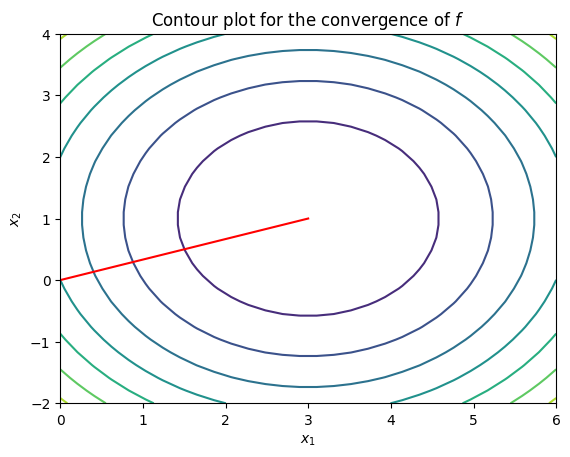

In [6]:
# contour plot for the best alpha 
x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-2)

xv = np.linspace(0,6, 30)
yv = np.linspace(-2,4, 30)
xx, yy = np.meshgrid(xv, yv)
f_ = lambda x, y:f(np.array([x,y]))
zz = f_(xx, yy)
plt.figure()
plt.title("Contour plot for the convergence of $f$")
plt.contour(xx, yy, zz)
plt.plot([X[0] for X in x_val], [X[1] for X in x_val], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

now repeat the process for a slightly different function 

In [7]:
def f(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1, x2 = x
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x_true = np.array([1,2])

plot the function 

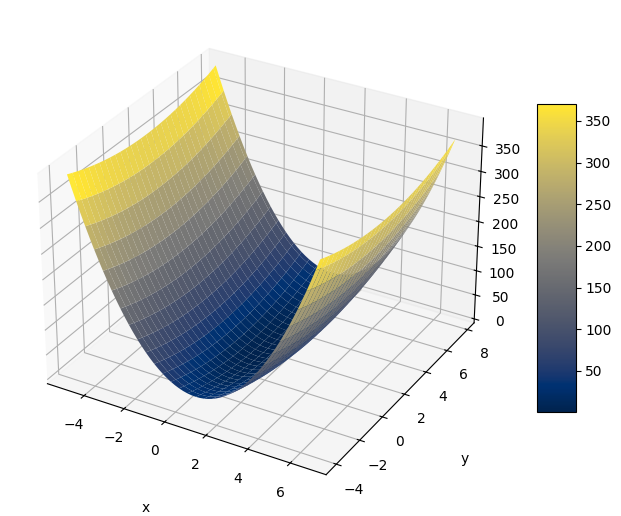

In [8]:
# plot the function
# prepare the mesh
x = np.arange(-5,7,0.2)
y = np.arange(-4,8,0.2)
X, Y = np.meshgrid(x, y)

# compute the value of f on the mesh
Z = np.zeros((60,60))
for i in range(60):
    for j in range(60):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))

# prepare the 3D space 
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

# plot
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

perform the experiment 

alplha = 0.1: GD on the function f converges after 1000 iterations to the point [0. 2.]
alplha = 0.01: GD on the function f converges after 526 iterations to the point [1.         1.99995148]
alplha = 0.001: GD on the function f converges after 1000 iterations to the point [1.         1.72987096]
alplha = 0.0001: GD on the function f converges after 1000 iterations to the point [0.86493548 0.36257125]


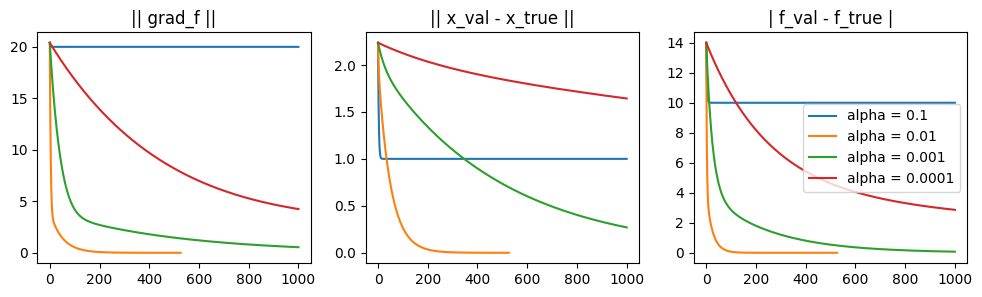

In [9]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# chose the initial iteration 
x0 = np.zeros((2,))

# set step-size range
alphas = (1e-1, 1e-2, 1e-3, 1e-4)
plt.figure(figsize=(12,3))

for alpha in alphas:

    # test the algorithm
    x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

    # plot the results
    print(f"alplha = {alpha}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

    plt.subplot(1, 3, 1)
    plt.plot(norm_grads)
    plt.title("|| grad_f ||")

    plt.subplot(1, 3, 2)
    plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
    plt.title("|| x_val - x_true ||")
    
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(f_val - f(x_true)))
    plt.title("| f_val - f_true |")
    
plt.legend([f"alpha = {alpha}" for alpha in alphas])
plt.show()

show the contour plot for alpha = 0.1. Why we can't reach the solution???

Text(0, 0.5, '$x_2$')

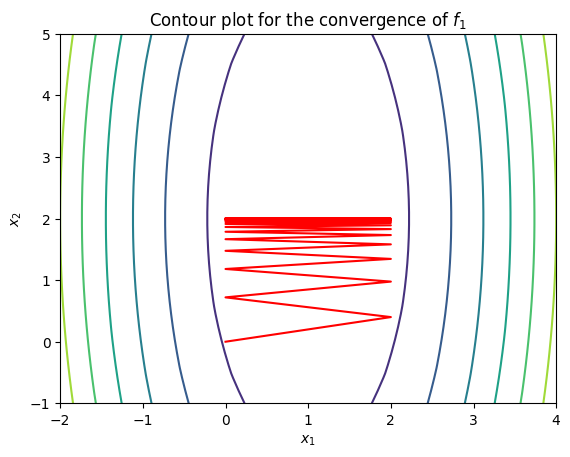

In [11]:
# with alpha = 1e-1 we can't reach the solution, as we can see from the contour plot 

# contour plot for the best alpha 
x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-1)

xv = np.linspace(-2,4, 30)
yv = np.linspace(-1,5, 30)
xx, yy = np.meshgrid(xv, yv)
f_ = lambda x, y:f(np.array([x,y]))
zz = f_(xx, yy)
plt.figure()
plt.title("Contour plot for the convergence of $f_1$")
plt.contour(xx, yy, zz)
plt.plot([X[0] for X in x_val], [X[1] for X in x_val], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")